# Importation de bibliothèques

In [67]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [68]:
arcene_train = pd.read_csv("./data/ARCENE/arcene_train.data", sep=" ", header=None).drop([10000], axis=1)
arcene_train_labels = pd.read_csv("./data/ARCENE/arcene_train.labels", sep=" ", header=None)
arcene_valid = pd.read_csv("./data/ARCENE/arcene_valid.data", sep=" ", header=None).drop([10000], axis=1)
arcene_valid_labels = pd.read_csv("./data/arcene_valid.labels", sep=" ", header=None)

# Impression des données

In [69]:
print(arcene_train)

    0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      0    71     0    95     0   538   404    20     0     0  ...   255   
1      0    41    82   165    60   554   379     0    71     0  ...   213   
2      0     0     1    40     0   451   402     0     0     0  ...   235   
3      0    56    44   275    14   511   470     0     0     0  ...    91   
4    105     0   141   348     0   268   329     0     0     1  ...   813   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95    24    26     0   461     0   545     0    17   159   177  ...   275   
96    40     0     0   419    71   502     0    39    93   163  ...   277   
97     2    15    48   677     0   434   442     0    43     0  ...   211   
98     8     0    38   205    69   419   454     0   113     3  ...   193   
99     0     0     0   148     0   583     0     6   130   112  ...   271   

    9991  9992  9993  9994  9995  9996  9997  9998  9999  
0    570    86  

# Concaténation des données d'apprentissage et des étiquettes

In [70]:
arcene_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)

print(arcene_concatinated)

    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...   

    9991   9992   9993   99

# Vérifier si l'ensemble de données est équilibré

   0  count
0 -1     56
1  1     44


<Axes: xlabel='0', ylabel='count'>

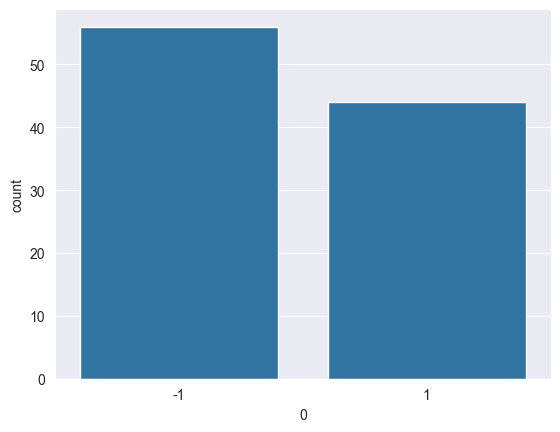

In [85]:
xx = arcene_train_labels[0].value_counts().reset_index()
print(xx)
sns.barplot(x=0, y='count', data=xx)

# Prétraitement des données

### Suppression des lignes dupliquées et des lignes avec des valeurs manquantes

In [71]:
missing_values = False
duplicates = False

if arcene_concatinated.isna().values.any():
    missing_values = True
    arcene_concatinated.dropna(inpLace=True)

if arcene_concatinated.duplicated().any():
    duplicates = True
    arcene_concatinated.drop_duplicates(inpLace=True)
    
# Resume
print("Missing values detected: ", missing_values)
print("Duplicate rows detected: ", duplicates)

print(arcene_concatinated)

Missing values detected:  False
Duplicate rows detected:  False
    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583 

### Visualisation exemplaire d'un diagramme de dispersion

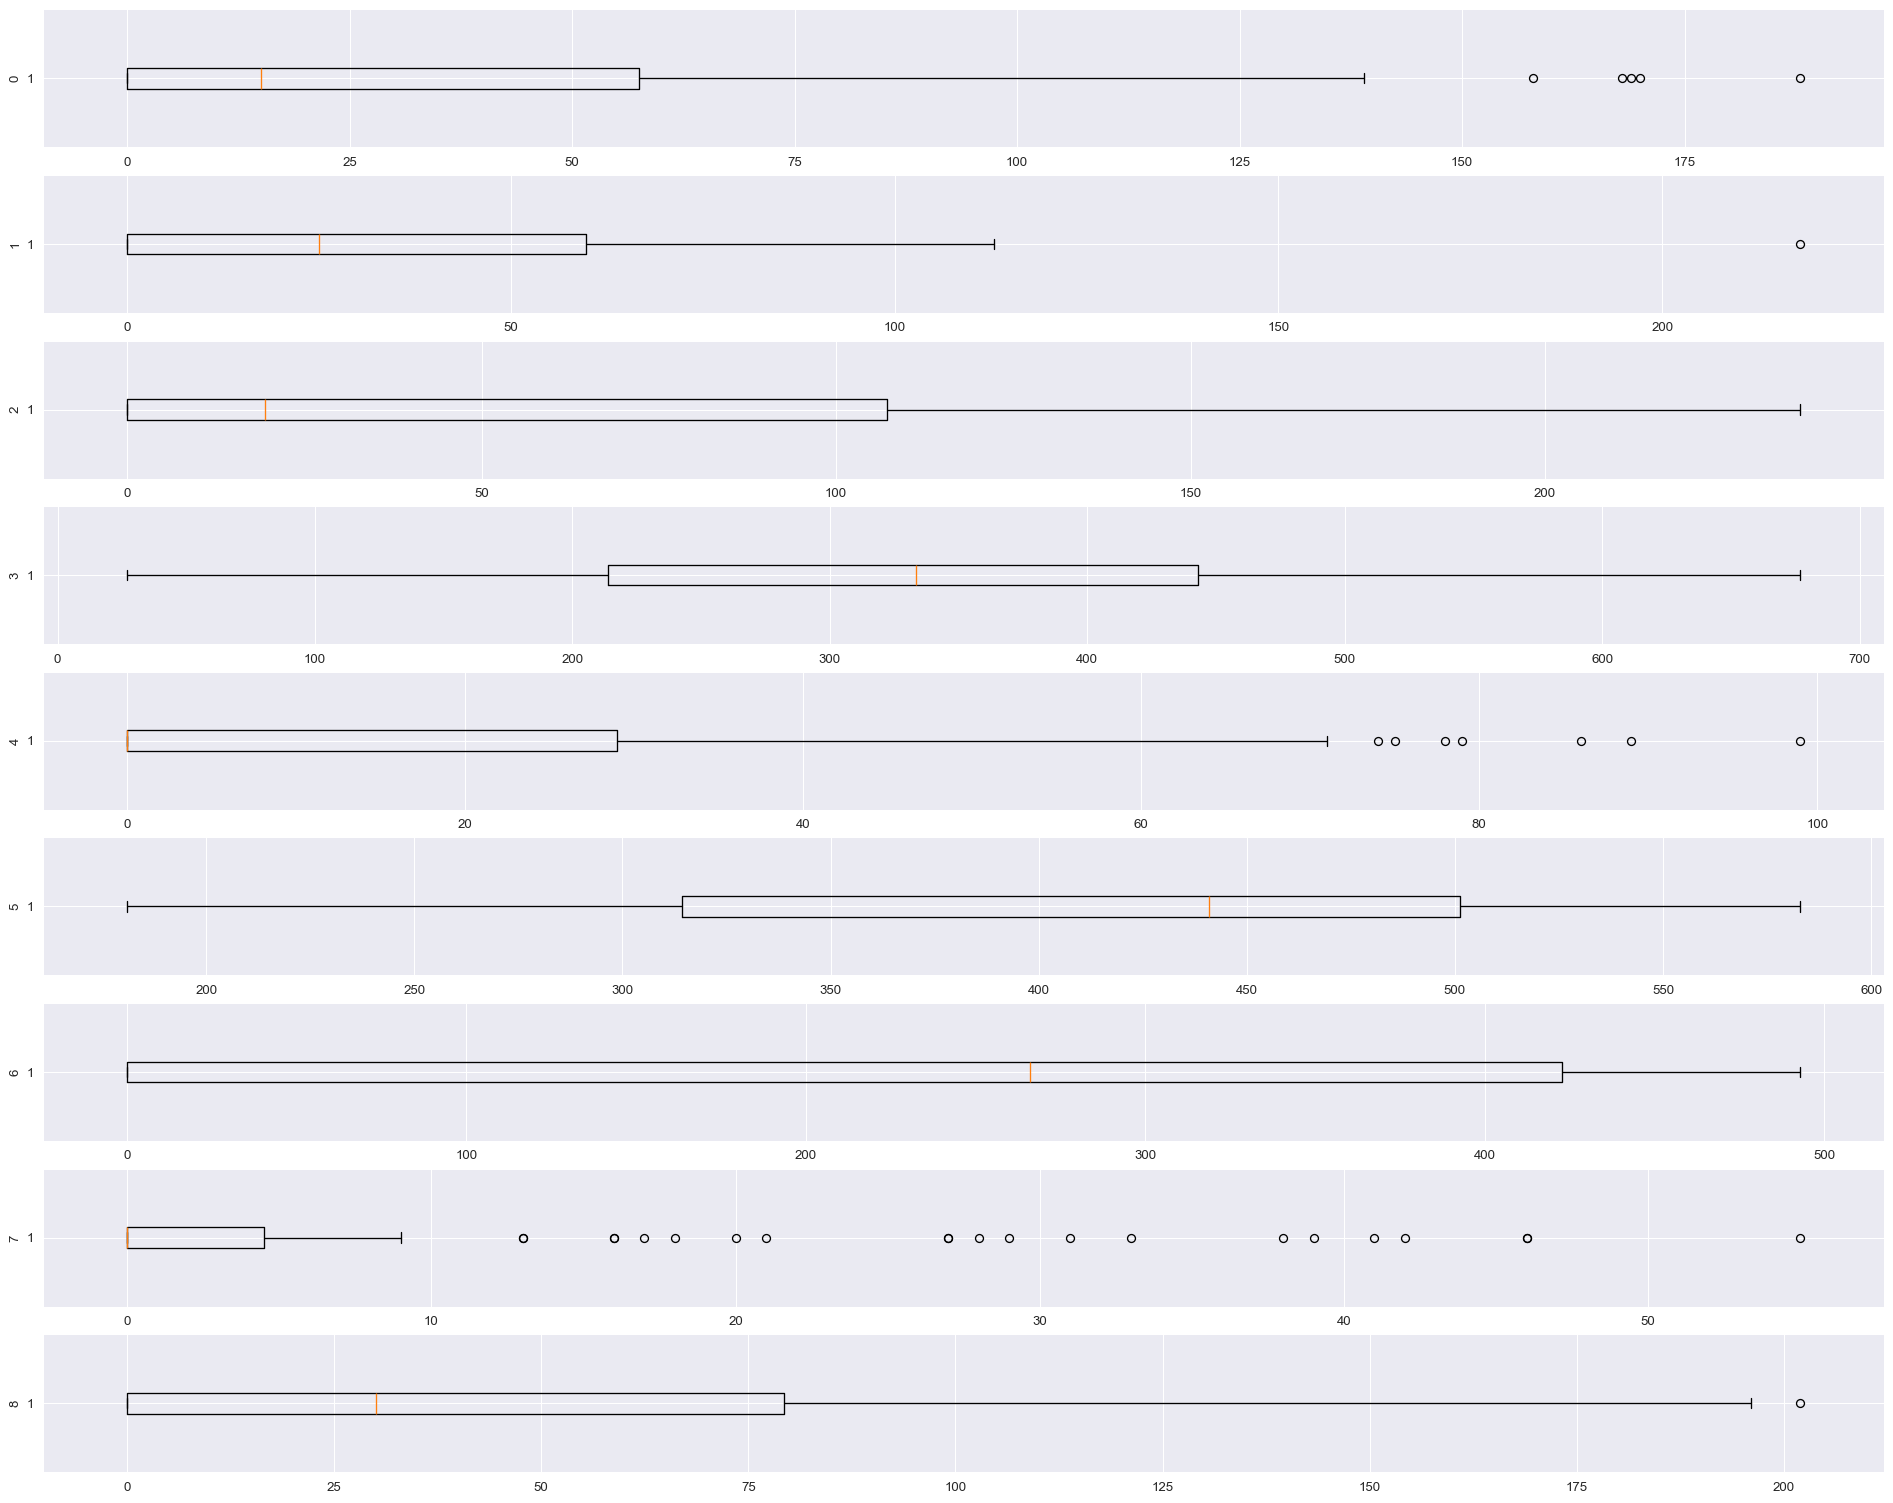

In [72]:
fig, axs = plt.subplots(9,1,dpi=95, figsize=(25,20))
i = 0
for col in range(9):
    axs[i].boxplot(arcene_concatinated[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [73]:
print(arcene_concatinated)

    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...   

    9991   9992   9993   99

### Suppression des valeurs extrêmes (valeurs aberrantes)
##### Il existe de nombreuses techniques pour supprimer les valeurs aberrantes. Nous allons essayer l'approche basée sur le Z-score et le percentile.

##### Approche du score Z :

In [74]:
processed_arcene_train_zscore = arcene_concatinated.copy()

for col in arcene_concatinated.columns:
    processed_arcene_train_zscore[np.abs(stats.zscore(processed_arcene_train_zscore[col])) < 3]
    
# Resume
print("Number of outliers detected: ", 100 - processed_arcene_train_zscore.shape[0])

print(processed_arcene_train_zscore)

Number of outliers detected:  0
    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...

##### Approche basée sur les percentiles :

Exemple de calcul des percentiles et de l'intervalle interquartile (IQR) pour une colonne

In [75]:
q1, q3 = np.percentile(arcene_concatinated[0], [25, 75], method='midpoint')
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

print(q1, q3, iqr, upper_bound, lower_bound)

0.0 58.0 58.0 145.0 -87.0


Suppression des valeurs aberrantes pour toutes les colonnes avec la méthode des percentiles:

In [76]:
processed_arcene_train_per = arcene_concatinated.copy()

for col in processed_arcene_train_per.columns[0:10000]:
    print(processed_arcene_train_per.shape)
    if processed_arcene_train_per.shape[0] != 0:
        q1, q3 = np.percentile(processed_arcene_train_per[col], [25, 75], method='midpoint')
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
    
        # # Create arrays of Boolean values indicating the outlier rows
        # upper_array = np.where(processed_arcene_train_per[col] >= upper_bound)[0]
        # lower_array = np.where(processed_arcene_train_per[col] <= lower_bound)[0]
        # 
        # # Removing the outliers
        # for i, j in zip(upper_array, lower_array):
        #     if i in processed_arcene_train_per.index:
        #         processed_arcene_train_per.drop(index=upper_array, inplace=True)
        #     if j in processed_arcene_train_per.index:
        #         processed_arcene_train_per.drop(index=lower_array, inplace=True)
        
        processed_arcene_train_per = processed_arcene_train_per[((processed_arcene_train_per > lower_bound) & (processed_arcene_train_per < upper_bound)).any(axis=1)]

# Resume
print("Number of outliers detected: ", 100 - processed_arcene_train_per.shape[0])

print(processed_arcene_train_per)

(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(100, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 10001)
(0, 1000

Mais il y a un problème avec cette approche. à un moment donné, nous supprimons trop de lignes et nous nous retrouvons avec un ensemble de données vide. (Precisement lors du traitement de la colonne 11). Donc on doit modifier l'approche pour saute les colonnes ou toutes les valeurs sont aberrantes, ou ne pas utiilies la méthode des percentiles.